<a href="https://colab.research.google.com/github/xRiyaPathak/Forest-Forecasters/blob/main/Forest_Forcasters_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center;">
<img src="https://github.com/xRiyaPathak/Forest-Forecasters/blob/main/Swan_Teleco.png?raw=true"
     alt="DigitalFuturesLogo"
    width="250" height="250"
     style="float: center; margin-right: 10px;" />
</p>


<h1 style="text-align: center;">Swan Teleco - Part 2</h1>
<h2 style="text-align: center;">Data Retention Analysis & Customer Churn</h2>
<h3 style="text-align: center;">Forest Forecasters</h3>
<h4 style="text-align: center;">Andrew, Hasan, Natalie, Riya</h4>
<h5 style="text-align: left;">28-02-2024</h5>

# **0: Code used to set up the Data for modelling**

The first half of this document summarises how we performed EDA, Data Cleaning, Test- Train Split and Feature Engineering as previously shown in the main Document.

To see the Decision Trees model please run all and go straight to the 'Decision Tree Modelling' Section

## *Imports and Reading the data

In [ ]:
# Usual 4
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Metrics and Time
from sklearn import metrics
from time import time

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # to visualise the DT

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (confusion_matrix, accuracy_score)

# New Models
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [ ]:
# Setting display options to show all columns
pd.set_option('display.max_columns', None)

In [ ]:
# Read the data
df = pd.read_excel("/content/1 - Project Data.xlsx", sheet_name="Telco_Churn", header=0)

df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN


## **EDA and Data Cleaning**
Same as main document ( not relevant to this worbook as already covered)

### Null Values

In [ ]:
# Checking Null Values
df.isnull().sum();

In [ ]:
# To fill the null values for customers who did not churn yet
df['Churn Reason'] = df['Churn Reason'].fillna('Not Churned')

In [ ]:
# Make all entries in 'Total Charges' Numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

In [ ]:
df.isnull().sum();

* Shows 11 nulls in Total Charges

In [ ]:
# Dropping the rows with null values in total charges
df.dropna(axis = 0, subset = ['Total Charges'], inplace=True)

In [ ]:
df.isnull().sum();

In [ ]:
df.dtypes;

* We will not use the Churn reason column at this stage.

In [ ]:
# New number of rows
df.shape;

### Looking at the Other Columns

In [ ]:
# Statistics of the numeric columns
df.describe();

In [ ]:
# Statistics of all columns
df.describe(include='all');

### **Column Analysis Notes:**

In [ ]:
## Looking at all the unique values from each column
# for column in df.columns:
#     unique_value = df[column].unique()
#     print(f"Unique values in '{column}': {unique_value}")

**What to Remove**
* Count -- as all rows have same value
* Country -- as all rows have same value
* State -- as all rows have same value
* 'Churn Label'. -- this is the same as churn value


**Columns with Yes/No values (map to 1/0)**
* Gender
* 'Senior Citizen'
* Partner
* Dependents
* 'Phone Service'
* 'Paperless Billing'

**One Hot encode these: **
* Multiple Lines
* 'Internet Service
* Online Security
* Online Backup'
* Device Protection
* Tech Support
* 'Streaming TV'
* 'Streaming Movies'
* Contract
* Payment Method

### Quick Visualisations

In [ ]:
# # Heat map to show correlations between current numeric values -- note do again once encoded other columns?
# plt.figure(figsize=(15,9))
# sns.heatmap(df.corr(),
#             annot=True,
#             cmap='rocket_r',
#             vmin = -1,
#             vmax = 1,
#             fmt = '.2',
#             mask = np.triu(df.corr()))
# plt.show()

## *Train- Test Split
Here we split the data into test and train data, same as in our main document

In [ ]:
# Feature Selection

feature_cols = [ 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges']

# Create features X' and target 'y' data
X = df[feature_cols]  # features
y = df['Churn Value']   # target

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.head();

In [ ]:
y_train.head();

In [ ]:
# Check that the X,y indexes match for the train
min(X_train.index == y_train.index);

In [ ]:
# Check that the X,y indexes match for the test
min(X_test.index == y_test.index);

## *Feature Engineering
This is the same as the feature engineering in our main document

In [ ]:
# Bring everything together into a feature engineering function

def feature_engineering(df):
    ''' Feature engineering function for swan teleco'''
    df = df.copy()

    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Senior Citizen'] = df['Senior Citizen'].map({'Yes':1, 'No':0})
    df['Partner'] = df['Partner'].map({'Yes':1, 'No':0})
    df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0})
    df['Phone Service'] = df['Phone Service'].map({'Yes':1, 'No':0})
    df['Paperless Billing'] = df['Paperless Billing'].map({'Yes':1, 'No':0})

    df = pd.get_dummies(df, columns = ['Multiple Lines'], drop_first = True, prefix = 'ML', dtype=int)
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'IS', dtype=int)
    df = pd.get_dummies(df, columns = ['Online Security'], drop_first = True, prefix = 'OS', dtype=int)
    df = pd.get_dummies(df, columns = ['Online Backup'], drop_first = True, prefix = 'OB', dtype=int)
    df = pd.get_dummies(df, columns = ['Device Protection'], drop_first = True, prefix = 'DP', dtype=int)
    df = pd.get_dummies(df, columns = ['Tech Support'], drop_first = True, prefix = 'TS', dtype=int)
    df = pd.get_dummies(df, columns = ['Streaming TV'], drop_first = True, prefix = 'STV', dtype=int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Con', dtype=int)
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'PM', dtype=int)
    df = pd.get_dummies(df, columns = ['Streaming Movies'], drop_first = True, prefix = 'SM', dtype=int)

    return df


In [ ]:
# Feature Eng to the train data
X_train_fe = feature_engineering(X_train)

In [ ]:
# Check all columns are numerical inputs for the model
X_train_fe.dtypes;

In [ ]:
# Feature Engineer the test data
X_test_fe = feature_engineering(X_test)

# **1: Decision Tree Modelling**

In [ ]:
# Check all columns are numerical?
X_train_fe.dtypes;

In [ ]:
# Fit the DT

dt = DecisionTreeClassifier(max_depth=3, # How many levels of nodes can i go down ## limit to prevent overfitting
                                 random_state=1)
dt = dt.fit(X_train_fe, y_train)

In [ ]:
dt.score(X_train_fe,y_train)

0.7900444444444444

In [ ]:
# Check the ckasses that the DT model learned about
dt.classes_

array([0, 1])

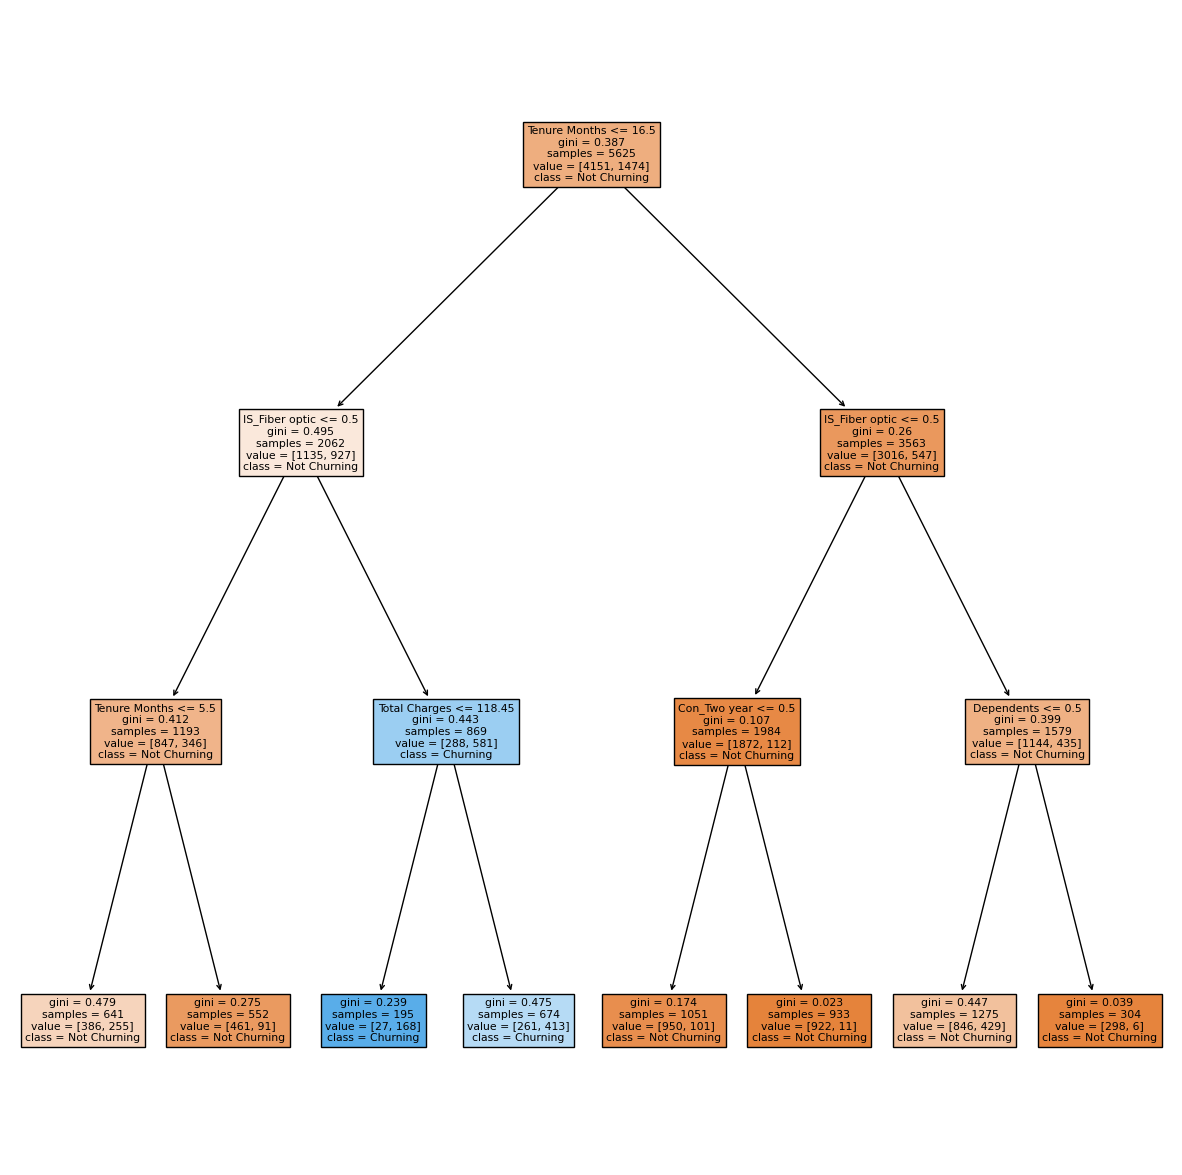

In [ ]:
# Visualise the DT

fig = plt.figure(figsize=(15,15))
tree_01 = tree.plot_tree(dt, # The decision tree itself
                      feature_names= list(X_train_fe.columns), # names of our classes
                      class_names=['Not Churning','Churning'], # the resulting classes names
                      filled=True)

In [ ]:
# Calculating the score of the test and train set
print(f'Score on training set: {dt.score(X_train_fe, y_train)}')
print(f'Score on testing set: {dt.score(X_test_fe, y_test)}')


Score on training set: 0.7900444444444444
Score on testing set: 0.7896233120113717


## Model selection using Gridsearch

In [ ]:
# MODEL SELECTION! -- cross validation

grid = GridSearchCV(estimator = DecisionTreeClassifier(),   # What algorithm/model to use?
                    param_grid = {'max_depth': [3, 5, 7, 10],   # How many levels can i go down
                                  'min_samples_split': [5, 10, 15, 20, 50, 100],  # how many samples to make a split?
                                  'min_samples_leaf': [2, 3, 4, 5, 6, 7],  # how many samples to make a leaf?
                                  'max_features':[2,5]},    # How many Parameters can i use?
                    cv = 10,    # How many splits
                    refit = True,   # do we refit the data on each run
                    verbose = 0,    # how much to tell us 0 = none, 1= some
                    scoring = 'accuracy')   # Whst performance metric am i maximising

In [ ]:
# Run the gridsearch & Record the current time
now = time()

# Fit the gridsearch on train
grid.fit(X_train_fe, y_train)

# Record the time when it stopped running
print(f' Time in seconds: {time() - now}')


 Time in seconds: 37.09272265434265


In [ ]:
# Check the best parameters identified by the gridsearch
grid.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [ ]:
# What is the best score? accuracy?
grid.best_score_

0.7950222182891602

In [ ]:
# Get the best tree
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=5, min_samples_leaf=2,
                       min_samples_split=5)

In [ ]:
# Pick the best tree:
dt2 = grid.best_estimator_

In [ ]:
# Fit on the training set
dt2.fit(X_train_fe, y_train)

DecisionTreeClassifier(max_depth=7, max_features=5, min_samples_leaf=2,
                       min_samples_split=5)

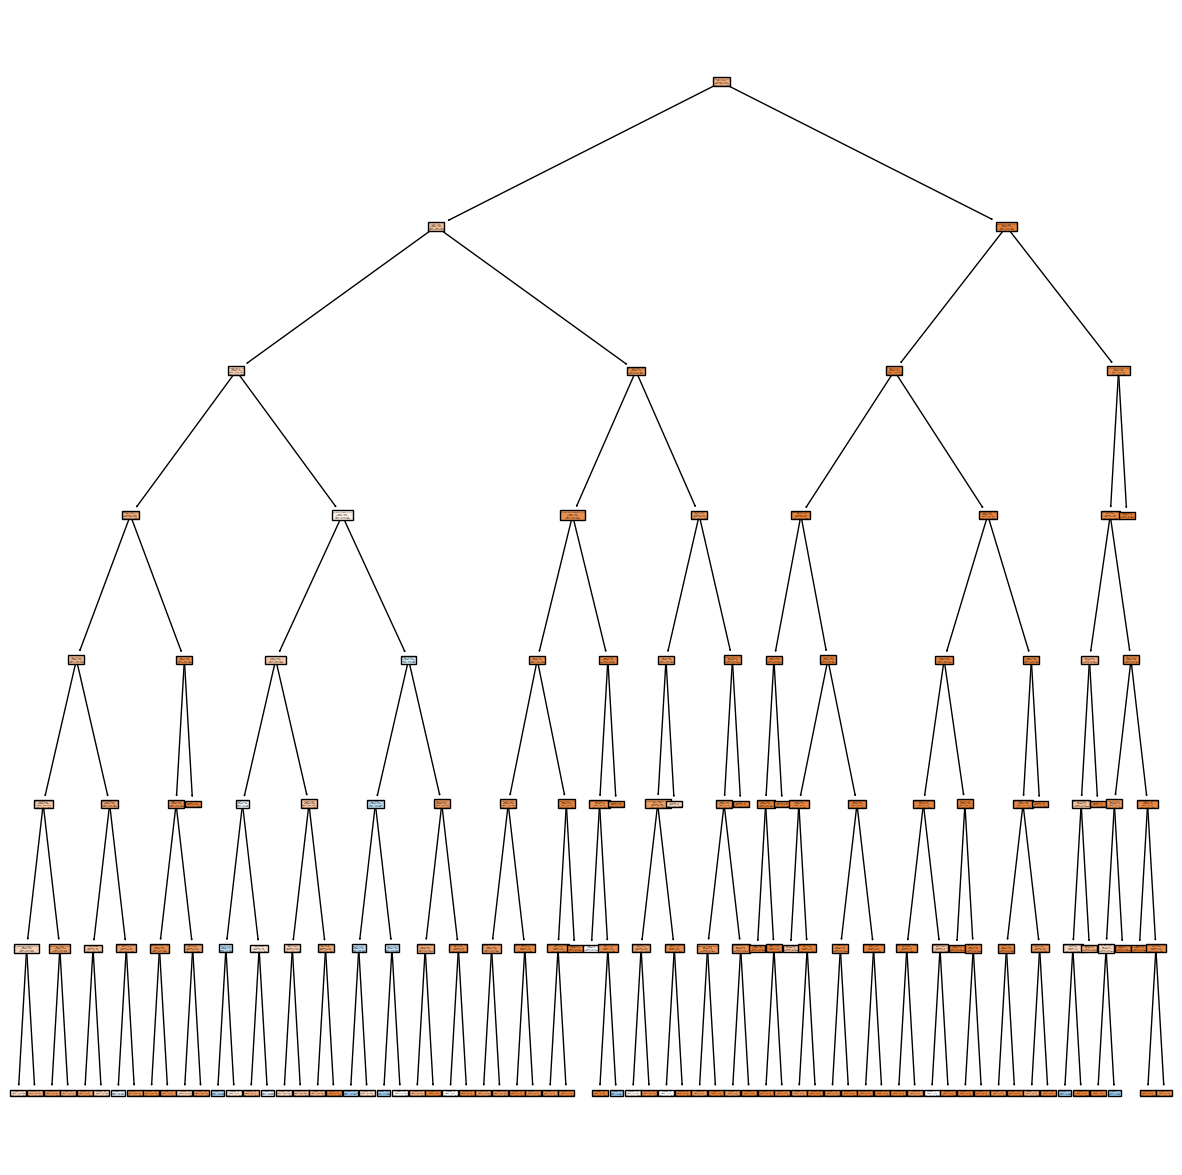

In [ ]:
# Show

fig = plt.figure(figsize=(15,15))
tree_02 = tree.plot_tree(dt2,
                      feature_names= list(X_train_fe.columns),
                      class_names=['Not Churning','Churning'],
                      filled=True)


* Feature Importance: The higher the value the more important the feature.

In [ ]:
# The scores have improved but it is a little overfit

print(f'Score on training set: {dt2.score(X_train_fe, y_train)}')
print(f'Score on testing set: {dt2.score(X_test_fe, y_test)}')

Score on training set: 0.7836444444444445
Score on testing set: 0.7611940298507462


In [ ]:
list(zip(list(X_train_fe.columns),dt.feature_importances_))

[('Gender', 0.0),
 ('Senior Citizen', 0.0),
 ('Partner', 0.0),
 ('Dependents', 0.08723286641350517),
 ('Tenure Months', 0.4625043154661495),
 ('Phone Service', 0.0),
 ('Paperless Billing', 0.0),
 ('Monthly Charges', 0.0),
 ('Total Charges', 0.03315823158741664),
 ('ML_No phone service', 0.0),
 ('ML_Yes', 0.0),
 ('IS_Fiber optic', 0.40465999372112926),
 ('IS_No', 0.0),
 ('OS_No internet service', 0.0),
 ('OS_Yes', 0.0),
 ('OB_No internet service', 0.0),
 ('OB_Yes', 0.0),
 ('DP_No internet service', 0.0),
 ('DP_Yes', 0.0),
 ('TS_No internet service', 0.0),
 ('TS_Yes', 0.0),
 ('STV_No internet service', 0.0),
 ('STV_Yes', 0.0),
 ('Con_One year', 0.0),
 ('Con_Two year', 0.012444592811799443),
 ('PM_Credit card (automatic)', 0.0),
 ('PM_Electronic check', 0.0),
 ('PM_Mailed check', 0.0),
 ('SM_No internet service', 0.0),
 ('SM_Yes', 0.0)]

## Evaluations- Predictions using the gridsearch model

In [ ]:
def apr(y_pred, y_real):
    """ Calculates accuracy, precision, recall
        Requires predicted value first, and then the real value
    """
    accuracy = metrics.accuracy_score(y_real, y_pred)
    precision = metrics.precision_score(y_real, y_pred)
    recall = metrics.recall_score(y_real, y_pred)
    f1 = metrics.f1_score(y_real, y_pred)

    print(f"Accuracy:{accuracy}")
    print(f"Precision:{precision}")
    print(f"Recall:{recall}")
    print(f"F1:{f1}")
    return accuracy, precision, recall, f1

In [ ]:
# Train data predictions
train_results = X_train_fe.copy()
train_results['y_pred'] = dt.predict(X_train_fe)
train_results['y_real'] = y_train
train_results['y_prob'] = dt.predict_proba(X_train_fe)[:,1]

train_results

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,SM_No internet service,SM_Yes,y_pred,y_real,y_prob
6030,1,0,1,0,24,1,1,93.00,2248.05,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0.336471
3409,0,0,1,0,40,1,1,78.85,3126.85,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0.336471
5482,1,0,1,0,4,1,0,65.60,250.10,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.397816
5523,0,0,0,0,4,1,0,55.50,227.35,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0.397816
6337,0,0,1,1,64,1,0,24.90,1595.50,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0.096099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,0,1,0,1,30,1,1,101.30,2974.50,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0.019737
5199,0,1,0,0,70,1,1,75.50,5212.65,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0.011790
5234,1,0,0,0,34,1,1,105.35,3540.65,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0.336471
5398,1,0,0,0,9,1,0,70.05,657.50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.612760


In [ ]:
# Test data predictions

test_results = X_test_fe.copy()
test_results['y_pred'] = dt.predict(X_test_fe)
test_results['y_real'] = y_test
test_results['y_prob'] = dt.predict_proba(X_test_fe)[:,1]

test_results

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Paperless Billing,Monthly Charges,Total Charges,ML_No phone service,ML_Yes,IS_Fiber optic,IS_No,OS_No internet service,OS_Yes,OB_No internet service,OB_Yes,DP_No internet service,DP_Yes,TS_No internet service,TS_Yes,STV_No internet service,STV_Yes,Con_One year,Con_Two year,PM_Credit card (automatic),PM_Electronic check,PM_Mailed check,SM_No internet service,SM_Yes,y_pred,y_real,y_prob
2478,0,0,1,0,42,1,0,25.25,1108.20,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0.011790
6783,1,0,0,0,43,0,0,44.15,1931.30,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0.096099
6125,0,0,0,0,27,1,1,89.20,2383.60,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0.336471
3052,1,0,0,0,65,1,1,19.55,1218.65,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0.011790
4097,0,0,0,0,29,1,1,71.00,2080.10,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0.096099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1,0,0,0,35,1,1,102.35,3626.10,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0.336471
5249,0,0,1,0,71,1,0,90.10,6310.90,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0.011790
5464,1,0,0,0,16,1,1,80.55,1248.90,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.612760
5851,1,0,0,0,31,1,0,20.45,638.55,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0.011790


### Results from this model

In [ ]:
apr(train_results['y_pred'], train_results['y_real'])

Accuracy:0.7900444444444444
Precision:0.6685845799769851
Recall:0.3941655359565807
F1:0.4959453691848058


(0.7900444444444444,
 0.6685845799769851,
 0.3941655359565807,
 0.4959453691848058)

In [ ]:
apr(test_results['y_pred'], test_results['y_real'])

Accuracy:0.7896233120113717
Precision:0.726027397260274
Recall:0.40253164556962023
F1:0.5179153094462541


(0.7896233120113717,
 0.726027397260274,
 0.40253164556962023,
 0.5179153094462541)

### Visualisations of the model (Confusion Matrix)

In [ ]:
# Visualise into a confusion matrix. --  using Alex's code
def conf_m(positive_label:str, negative_label:str, cut_off, df, y_pred_name, y_real_name):

    #Set pred to 0 or 1 depending on whether it's higher than the cut_off point.

    if cut_off != 'binary':
        df['pred_binary'] = np.where(df[y_pred_name] > cut_off , 1, 0)
    else:
        df['pred_binary'] = df[y_pred_name]

    #Build the CM
    cm = confusion_matrix(df[y_real_name], df['pred_binary'])

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, fmt='g');

    # labels, title, ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('Real labels');
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels([negative_label, positive_label])
    ax.yaxis.set_ticklabels([negative_label, positive_label]);

    print('Test accuracy = ', accuracy_score(df[y_real_name], df['pred_binary']))

    return accuracy_score(df[y_real_name], df['pred_binary'])

Test accuracy =  0.7900444444444444


0.7900444444444444

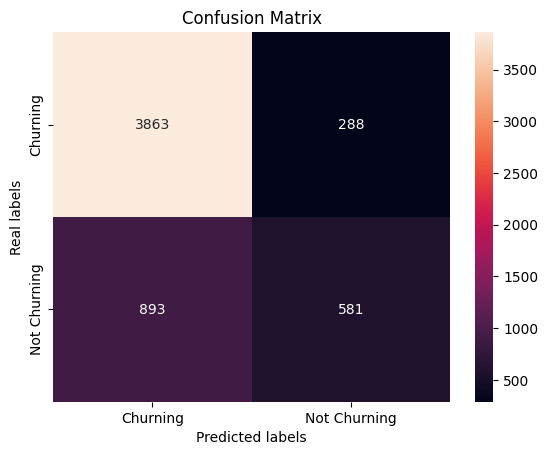

In [ ]:
# Train Confusion Matrix
conf_m('Not Churning','Churning', 'binary', train_results, 'y_pred', 'y_real')

Test accuracy =  0.7896233120113717


0.7896233120113717

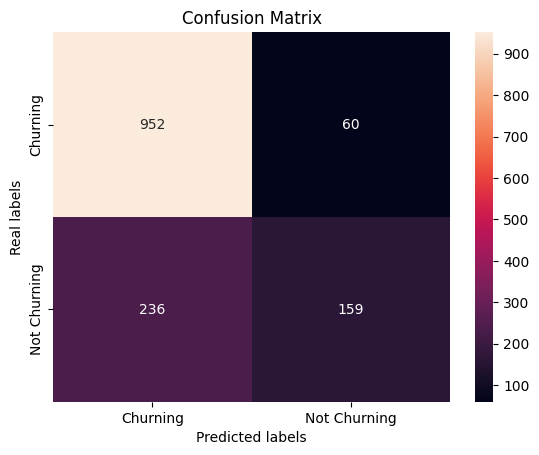

In [ ]:
# Test Confusion Matrix
conf_m('Not Churning','Churning', 'binary', test_results, 'y_pred', 'y_real')

Test accuracy =  0.7896233120113717


0.7896233120113717

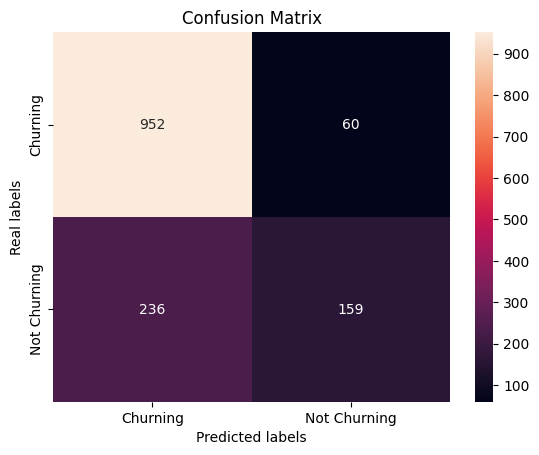

In [ ]:
# Changing the cut off values doesnt change the matrix at all!
conf_m('Not Churning','Churning',0.8, test_results, 'y_pred', 'y_real')

## Finetuning the model

In [ ]:
dt3 = grid.best_estimator_

In [ ]:
feature_cols = ['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Monthly Charges',
       'Total Charges', 'ML_Yes', 'IS_Fiber optic', 'OS_Yes', 'OB_No internet service',
       'STV_No internet service', 'STV_Yes', 'Con_One year', 'Con_Two year',
        'PM_Electronic check']

In [ ]:
list(zip(list(X_train_fe.columns),dt3.feature_importances_))

[('Gender', 0.005247200150077773),
 ('Senior Citizen', 0.0015532489514844417),
 ('Partner', 0.0028099240942100023),
 ('Dependents', 0.0890030550517924),
 ('Tenure Months', 0.014732619035697829),
 ('Phone Service', 0.004101562655708251),
 ('Paperless Billing', 0.010687555851316364),
 ('Monthly Charges', 0.03796982239190459),
 ('Total Charges', 0.04425771057166725),
 ('ML_No phone service', 0.0),
 ('ML_Yes', 0.0024621025089237255),
 ('IS_Fiber optic', 0.14548013484759792),
 ('IS_No', 0.12825484355593686),
 ('OS_No internet service', 0.0),
 ('OS_Yes', 0.020054009593387746),
 ('OB_No internet service', 0.0),
 ('OB_Yes', 0.019801694035250006),
 ('DP_No internet service', 0.0),
 ('DP_Yes', 4.4209884738857454e-06),
 ('TS_No internet service', 0.0),
 ('TS_Yes', 0.012311121041846338),
 ('STV_No internet service', 0.0003936844996533358),
 ('STV_Yes', 9.312415464890428e-05),
 ('Con_One year', 0.05422061866551337),
 ('Con_Two year', 0.330496432163517),
 ('PM_Credit card (automatic)', 0.00779977427

In [ ]:
# Fitting my model after removing less important features given by feature_importance
dt3.fit(X_train_fe[feature_cols], y_train)

DecisionTreeClassifier(max_depth=7, max_features=5, min_samples_leaf=2,
                       min_samples_split=5)

In [ ]:
# Predicting using finetuned model
# Results for Training Data

train_results_finetuned = X_train_fe[feature_cols].copy()
train_results_finetuned['y_pred'] = dt3.predict(X_train_fe[feature_cols])
train_results_finetuned['y_real'] = y_train
train_results_finetuned['y_prob'] = dt3.predict_proba(X_train_fe[feature_cols])[:,1]

train_results_finetuned

,Senior Citizen,Partner,Dependents,Tenure Months,Monthly Charges,Total Charges,ML_Yes,IS_Fiber optic,OS_Yes,OB_No internet service,STV_No internet service,STV_Yes,Con_One year,Con_Two year,PM_Electronic check,y_pred,y_real,y_prob
6030,0,1,0,24,93.00,2248.05,1,1,0,0,0,1,0,0,1,1,0,0.517327
3409,0,1,0,40,78.85,3126.85,1,1,0,0,0,0,0,0,0,1,0,0.517327
5482,0,1,0,4,65.60,250.10,1,0,0,0,0,1,0,0,1,0,0,0.285714
5523,0,0,0,4,55.50,227.35,0,0,0,0,0,1,0,0,0,0,0,0.285714
6337,0,1,1,64,24.90,1595.50,1,0,0,1,1,0,1,0,0,0,0,0.010753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3777,1,0,1,30,101.30,2974.50,1,1,0,0,0,1,0,0,1,0,0,0.044444
5199,1,0,0,70,75.50,5212.65,1,0,0,0,0,1,0,1,0,0,0,0.009501
5234,0,0,0,34,105.35,3540.65,1,1,0,0,0,1,0,0,1,1,0,0.517327
5398,0,0,0,9,70.05,657.50,0,1,0,0,0,0,0,0,0,1,0,0.561594


In [ ]:
# finetuned results for test data
# Do same for test data

test_results_finetuned = X_test_fe[feature_cols].copy()
test_results_finetuned['y_pred'] = dt3.predict(X_test_fe[feature_cols])
test_results_finetuned['y_real'] = y_test
test_results_finetuned['y_prob'] = dt3.predict_proba(X_test_fe[feature_cols])[:,1]

test_results_finetuned

,Senior Citizen,Partner,Dependents,Tenure Months,Monthly Charges,Total Charges,ML_Yes,IS_Fiber optic,OS_Yes,OB_No internet service,STV_No internet service,STV_Yes,Con_One year,Con_Two year,PM_Electronic check,y_pred,y_real,y_prob
2478,0,1,0,42,25.25,1108.20,1,0,0,1,1,0,0,1,1,0,0,0.025974
6783,0,0,0,43,44.15,1931.30,0,0,0,0,0,0,1,0,1,0,0,0.105802
6125,0,0,0,27,89.20,2383.60,0,1,0,0,0,0,0,0,1,0,0,0.273585
3052,0,0,0,65,19.55,1218.65,0,0,0,1,1,0,0,1,0,0,0,0.000000
4097,0,0,0,29,71.00,2080.10,1,0,0,0,0,1,1,0,0,0,0,0.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,0,0,0,35,102.35,3626.10,0,1,0,0,0,1,1,0,0,0,1,0.273585
5249,0,1,0,71,90.10,6310.90,1,0,1,0,0,1,0,1,1,0,0,0.040000
5464,0,0,0,16,80.55,1248.90,1,1,0,0,0,0,0,0,0,1,0,0.777202
5851,0,0,0,31,20.45,638.55,0,0,0,1,1,0,0,1,0,0,0,0.000000


### Results from finetuned model

In [ ]:
# Scores for finetuned model on training data

train_scores_finetuned = apr(train_results_finetuned['y_pred'], train_results_finetuned['y_real'])

Accuracy:0.8069333333333333
Precision:0.6312584573748309
Recall:0.6329715061058344
F1:0.6321138211382114


In [ ]:
# Score for finetuned model on test data

test_scores_finetuned = apr(test_results_finetuned['y_pred'], test_results_finetuned['y_real'])

Accuracy:0.7953091684434968
Precision:0.6442048517520216
Recall:0.6050632911392405
F1:0.6240208877284594


* Accuracy has improved but model is still **overfit** by 2.15%
* F1 score has decreased for both training data and test data

# **2: Random Forests**

In [ ]:
# Two ensemble methods to try to create a better model
rf = RandomForestClassifier(n_estimators=50) #Random Tree method

In [ ]:
# Check the cross validation for these two
rf_score = cross_val_score(rf, X_train_fe, y_train, cv=5)

In [ ]:
# print random forest score and extra tree score
print(f'Random scored {rf_score}')

Random scored [0.79466667 0.78844444 0.79111111 0.77422222 0.808     ]


In [ ]:
# gridsearch to improve rf

rf_params = {
    'n_estimators': [100, 150, 200], #how many trees.
    'max_depth': [None, 1, 2, 3, 4, 5], #how many levels per tree.
}

#create a gridsearch on rf that we created above to find optimal model
grd = GridSearchCV(rf, param_grid=rf_params, cv=5, verbose = 0)

#fit it on train
grd.fit(X_train_fe, y_train)

#print out the best accuracy score
print(grd.best_score_)

#check the best parameters
grd.best_params_

0.7955555555555556


{'max_depth': 5, 'n_estimators': 150}

In [ ]:
# Check our score

grd.score(X_train_fe, y_train)

0.8037333333333333

In [ ]:
# Check score for test now
grd.score(X_test_fe, y_test)

# It's performing better now but it's still overfit

0.8045486851457001

### Finetuning random forest - (Commented out)
This Code is commented out due to how long it takes to run, if you want to use it please uncomment it to run



In [ ]:
# # feature_colunss
# feature_cols = ['Gender', 'Senior Citizen', 'Partner', 'Dependents',
#        'Paperless Billing', 'ML_No phone service', 'ML_Yes', 'IS_Fiber optic',
#        'OS_Yes', 'OB_Yes', 'DP_Yes', 'TS_Yes', 'STV_Yes',
#        'Con_One year', 'Con_Two year',
#        'PM_Credit card (automatic)', 'PM_Electronic check', 'PM_Mailed check']

In [ ]:
# ## trying hypertuning for rf

# rf_params = {
#     'n_estimators': [50, 100, 150, 200], #how many trees.
#     'max_depth': [None, 1, 2, 3, 4, 5, 6, 7], #how many levels per tree.
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# #create a gridsearch on rf that we created above to find optimal model
# grd2 = GridSearchCV(rf, param_grid=rf_params, cv=10, verbose = 1)

# #fit it on train
# grd2.fit(X_train_fe[feature_cols], y_train)

# #print out the best accuracy score
# print(grd2.best_score_)

# #check the best parameters
# grd2.best_params_

In [ ]:
## Check our score for hypertuned rf

# grd2.score(X_train_fe[feature_cols], y_train)

In [ ]:
## Check score for test now with refined rf

#grd2.score(X_test_fe[feature_cols], y_test)

In [ ]:
# Check how well the refined rf is doing on train data

# apr(grd2.predict(X_train_fe[feature_cols]), y_train)

In [ ]:
# Chceck on test data

# apr(grd2.predict(X_test_fe[feature_cols]), y_test)

## Bag Method

In [ ]:
#creating bag

bag = BaggingClassifier(estimator=DecisionTreeClassifier())

In [ ]:
## Fit it on Train

bag.fit(X_train_fe, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [ ]:
# Check accuracy on train
bag.score(X_train_fe, y_train)

0.9818666666666667

In [ ]:
## check accuracy on Test

bag.score(X_test_fe, y_test)

0.783226723525231

In [ ]:
# Using gridsearch to find optimal bag

bag_params = {
    'n_estimators': [100, 150, 200], #how many trees.
}

#create a gridsearch on bag that we created above
gridbag = GridSearchCV(bag, param_grid=bag_params, cv=5, verbose = 0)

#fit it on train
gridbag.fit(X_train_fe, y_train)

#print out the best accuracy score
print(gridbag.best_score_)

#check the best parameters
gridbag.best_params_

0.7888000000000001


{'n_estimators': 200}

In [ ]:
# Use the grid search's best estimator as my new bag

dbag = gridbag.best_estimator_

# Fitting the model
dbag.fit(X_train_fe, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200)

In [ ]:
## Use MY BAG to predict on X_train_fe, and y_train
apr(dbag.predict(X_train_fe), y_train)

Accuracy:0.9980444444444444
Precision:0.9966055668703326
Recall:0.9959294436906377
F1:0.9962673905666779


(0.9980444444444444,
 0.9966055668703326,
 0.9959294436906377,
 0.9962673905666779)

In [ ]:
# Predict on test data
apr(dbag.predict(X_test_fe), y_test)

Accuracy:0.7803837953091685
Precision:0.6387096774193548
Recall:0.5012658227848101
F1:0.5617021276595745


(0.7803837953091685,
 0.6387096774193548,
 0.5012658227848101,
 0.5617021276595745)

In [ ]:
# Check accuracy on train
dbag.score(X_train_fe, y_train)


0.9980444444444444

In [ ]:
## check accuracy on Test

dbag.score(X_test_fe, y_test)

0.7803837953091685

##### The model is extremely **overfit**, despite performing well with training data

### Finetuning Bag

In [ ]:
# Using gridsearch to find optimal bag
# Using feature column selection from earlier

bag_params = {
    'n_estimators': [100, 150, 200], #how many trees.
}

#create a gridsearch on bag that we created above
gridbag2 = GridSearchCV(bag, param_grid=bag_params, cv=5, verbose = 0)

#fit it on train
gridbag2.fit(X_train_fe[feature_cols], y_train)

#print out the best accuracy score
print(gridbag2.best_score_)

#check the best parameters
gridbag2.best_params_

0.7831111111111111


{'n_estimators': 200}

In [ ]:
# Use the grid search's best estimator as my new bag

dbag_hypertuned = gridbag2.best_estimator_

# Fitting the model
dbag_hypertuned.fit(X_train_fe[feature_cols], y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200)

In [ ]:
## Use MY BAG to predict on X_train_fe, and y_train

apr(dbag_hypertuned.predict(X_train_fe[feature_cols]), y_train)

Accuracy:0.9943111111111111
Precision:0.9911444141689373
Recall:0.9871099050203528
F1:0.9891230455472467


(0.9943111111111111,
 0.9911444141689373,
 0.9871099050203528,
 0.9891230455472467)

In [ ]:
# Predict on test data

apr(dbag_hypertuned.predict(X_test_fe[feature_cols]), y_test)

Accuracy:0.7796730632551528
Precision:0.6299694189602446
Recall:0.5215189873417722
F1:0.5706371191135734


(0.7796730632551528,
 0.6299694189602446,
 0.5215189873417722,
 0.5706371191135734)